In [0]:
import gluonts

In [0]:
import pydantic; print(pydantic.VERSION)

1.5


In [0]:
pip install pydantic==1.4

     |████████████████████████████████| 7.5MB 2.8MB/s 
  Found existing installation: pydantic 1.5.1
    Uninstalling pydantic-1.5.1:
      Successfully uninstalled pydantic-1.5.1


In [0]:
import gluonts
from gluonts.dataset.common import ListDataset

In [0]:
#!pip install mxnet
pip install gluonts

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 45.0MB/s 
     |████████████████████████████████| 7.4MB 7.2MB/s 
     |████████████████████████████████| 194kB 48.4MB/s 
     |████████████████████████████████| 235kB 45.4MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68019 sha256=4b1ab75e321800706412f4a19c3c19482b72a2ade6b037d9691857450d693107
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Found existing installation: 

In [0]:
# step 1 
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# step 2
%cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [0]:
import pandas as pd
caisofile= 'CaisoJan19March19windsolarAvg.csv'
caiso_dataset = pd.read_csv(caisofile)

In [0]:
caiso_dataset=caiso_dataset.rename(columns={"ws_forecast (avg) (california_iso)": "iso"})
# Independent System Operator

In [0]:
caiso_arr = caiso_dataset['iso']

In [0]:
caiso_dataset.head()

,DateTime,iso
0,2019-01-01 00:00:00,-2.333
1,2019-01-01 01:00:00,-2.333
2,2019-01-01 02:00:00,-2.333
3,2019-01-01 03:00:00,-2.667
4,2019-01-01 04:00:00,-3.000


In [0]:
# step 1 g 
# ne step 1 g : hierarchical order dataframes creation

# break the array into k sub-arrays : day of the week

# hour of the day: morning 6 am to 12 pm, afternoon 12 pm to 6 pm, evening 6 pm to 12 am, early morning 12 am to 6 am 

colnames=["DateTime", "iso"]
# define empty dfs 
morningdf = pd.DataFrame(columns=colnames)
afternoondf = pd.DataFrame(columns=colnames)
eveningdf = pd.DataFrame(columns= colnames)
earlymorningdf= pd.DataFrame(columns= colnames)

morning_time = []
morning_iso = []

afternoon_time = []
afternoon_iso = []

evening_time = []
evening_iso = []

earlymorning_time = []
earlymorning_iso = []

for index, row in caiso_dataset.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = date_time.split()
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    #print("hour min sec", hour_min_sec)
    hour= hour_min_sec[0]
    minute = hour_min_sec[1]   
    #print("hour", hour) 
    hour = float(hour)
    # determine zone
    if 0 <= hour <= 6:
      earlymorning_time.append(date_time)
      earlymorning_iso.append(iso_val)
    if 6 <= hour <=12:
      morning_time.append(date_time)
      morning_iso.append(iso_val)
    if 12 <= hour <= 18:
      afternoon_time.append(date_time)
      afternoon_iso.append(iso_val)
    if 18 <= hour <= 24:
      evening_time.append(date_time)
      evening_iso.append(iso_val)

# set dataframes

morningdf["DateTime"] = morning_time
morningdf["iso"] = morning_iso
earlymorningdf["DateTime"] = earlymorning_time
earlymorningdf["iso"]=earlymorning_iso
afternoondf["DateTime"] = afternoon_time
afternoondf["iso"] = afternoon_iso
eveningdf["DateTime"] = evening_time
eveningdf["iso"] = evening_iso

# use these as different series to draw xneg 


In [0]:
# make new df with diff columns where iso value is 0 if not in the right time 

column_names = ["DateTime", "morning","afternoon","evening", "earlymorning"]
hour_dataframe = pd.DataFrame(columns = column_names)



In [0]:
morning_iso = []

afternoon_iso = []

evening_iso = []

earlymorning_iso = []

dtime = []

for index, row in caiso_dataset.iterrows():
    date_time = row['DateTime']
    iso_val = row['iso']
    split_date_time = date_time.split()
    split_date_time1 = split_date_time[1]
    hour_min_sec = split_date_time1.split(":")
    #print("hour min sec", hour_min_sec)
    hour= hour_min_sec[0]
    minute = hour_min_sec[1]   
    #print("hour", hour) 
    hour = float(hour)
    # append time 
    dtime.append(date_time)

    # determine zone
    if 0 <= hour < 6:
      earlymorning_iso.append(iso_val)
      morning_iso.append(float('nan'))
      afternoon_iso.append(float('nan'))
      evening_iso.append(float('nan'))
    if 6 <= hour <12:
      morning_iso.append(iso_val)
      afternoon_iso.append(float('nan'))
      evening_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))
    if 12 <= hour < 18:
      afternoon_iso.append(iso_val)
      morning_iso.append(float('nan'))
      evening_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))
    if 18 <= hour < 24:
      evening_iso.append(iso_val)
      afternoon_iso.append(float('nan'))
      morning_iso.append(float('nan'))
      earlymorning_iso.append(float('nan'))


In [0]:
len(earlymorning_iso)

1415

In [0]:
len(dtime)

1415

In [0]:
hour_dataframe['DateTime'] = dtime
hour_dataframe['morning'] = morning_iso
hour_dataframe['earlymorning'] = earlymorning_iso
hour_dataframe['afternoon'] = afternoon_iso
hour_dataframe['evening'] = evening_iso

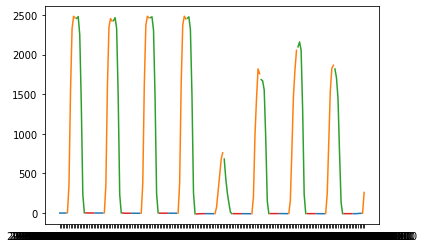

In [0]:
fig = plt.figure()

max_lim = 200

plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['earlymorning'][1:max_lim] )
plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['morning'][1:max_lim])
plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['afternoon'][1:max_lim])
plt.plot(hour_dataframe['DateTime'][1:max_lim], hour_dataframe['evening'][1:max_lim])

#plt.ylim(-30, 500) Note: Add legend to id. colors 
plt.show()

In [0]:
float('nan')

ValueError: ignored

In [0]:
import matplotlib.pyplot as plt

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 75.0, 90.0) # change the interval values 
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [0]:
hour_dataframe['DateTime']

0       2019-01-01 00:00:00
1       2019-01-01 01:00:00
2       2019-01-01 02:00:00
3       2019-01-01 03:00:00
4       2019-01-01 04:00:00
               ...         
1410    2019-02-28 19:00:00
1411    2019-02-28 20:00:00
1412    2019-02-28 21:00:00
1413    2019-02-28 22:00:00
1414    2019-02-28 23:00:00
Name: DateTime, Length: 1415, dtype: object

In [0]:
hour_dataframe.iplot(kind='scatter', )

In [0]:
# other hier. plots

# plot diff months

# plot diff aggreg / iso table:  Real Time LMP, Day Ahead LMP, Real Time Load
# zone

# make hierarchy based on trend ? : calculate trend of various intervals and evaluate on smoothness of the line 


In [0]:
# calculate trend with rolling mean 

In [0]:
#@title trend with tsa decompose
# find the trend 

from statsmodels.tsa.seasonal import seasonal_decompose

# remove 0 and neg values
caiso_nonneg = caiso_dataset[caiso_dataset['iso']>0]

caiso_nonneg.head()

seas_result = seasonal_decompose(caiso_nonneg.iso, freq=5, model='multiplicative')
seas_result.plot()

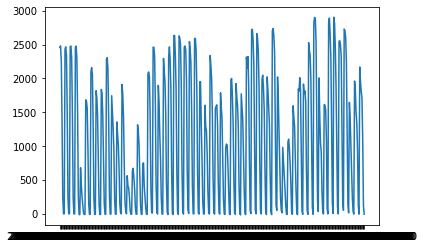

In [0]:
import pandas as pd
# dataframe that holds different hours
# create df with col names
#column_names = ["morning","afternoon","evening", "earlymorning"]
#hour_dataframe = pd.DataFrame(columns = column_names)
#hour_dataframe[]

# plot multiple dataframes 
import matplotlib.pyplot as plt

fig = plt.figure()

#for frame in [morningdf]: #, afternoondf, eveningdf
#  plt.plot(frame['DateTime'], frame['iso'])

#plt.plot(morningdf['DateTime'], morningdf['iso'])
plt.plot(afternoondf['DateTime'], afternoondf['iso'])


plt.show()

In [0]:
energy_series = caiso_dataset.loc[:, ('iso')]

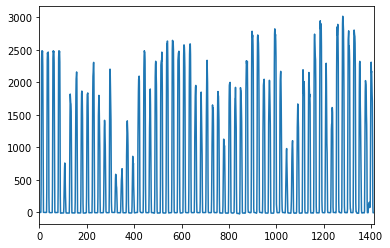

In [0]:
energy_series.plot()

In [0]:
import plotly

In [0]:
pip install plotly==3.10.0

     |████████████████████████████████| 41.5MB 114kB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [0]:
energy_series.values

array([-2.333, -2.333, -2.333, ..., -4.667, -5.   , -5.333])

In [0]:
energy_data = go.Scatter(x=energy_series.index,
                         y=energy_series.values)

In [0]:
layout = go.Layout(title='Energy Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(kWh)'))

In [0]:
import plotly

In [0]:
plotly.tools.set_credentials_file(username='sy2657',                                              
                                  api_key='565mDD9ygRWTlWKfXuDb')

In [0]:
fig = go.Figure(data=[energy_data], layout=layout)
py.iplot(fig, sharing='public')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sy2657/0 or inside your Plotly account where it is named 'plot from API'


In [0]:
#https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af


In [0]:
# step 1 c
from gluonts.dataset.common import ListDataset

training_data_caiso = ListDataset(
    [{"start": "2019-01-01 00:00:00" , "target": caiso_dataset.iso.values}],
    freq = "1H"
)

In [0]:
# step 3- load into arrays 'watts' and 'time_stamps'
import csv
row_num = 0

watts = []
time_stamps =[]

with open('CD_INTERVAL_READING_ALL_NO_QUOTES.csv', newline='') as csvfile:
  reader = csv.reader(csvfile, delimiter=' ')
  for row in reader:
    row_num = row_num+1
    #print(row[0])
    sdata = row[1]
    tsplit = sdata.split(',')
    if row_num==1:
      continue
    #print(row[1])
    #print(tsplit[3])
    ntsplit = float(tsplit[3])
    watts.append(ntsplit)
    time_stamps.append(tsplit[0])
    #print(row[2])
    #print(row[3])
    #print(row[4])
    if row_num > 80000:
      break


In [0]:
watts[0]

0.141

In [0]:
# step 4
import numpy as np
awatts = np.array(watts)

In [0]:
# step 5
import pandas as pd
#import numpy as np
pred_length = 10


In [0]:
#@title
# step 6
from gluonts.dataset.common import ListDataset
start = pd.Timestamp(time_stamps[0], freq="0.5H")

ModuleNotFoundError: ignored

In [0]:
#@title
# step 7
#freq="0.5H"

pred_length = 3000
freq="0.5H"

train_ds1 = ListDataset([{'target': x, 'start': start} for x in awatts[:-pred_length]], freq = freq)

test_ds1 = ListDataset([{'target':x, 'start':start} for x in awatts], freq= freq)

In [0]:
#from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
#dataset = get_dataset("m4_hourly", regenerate= False)

INFO:root:downloading and processing m4_hourly


saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/train/data.json
saving time-series into /root/.mxnet/gluon-ts/datasets/m4_hourly/test/data.json


In [0]:
freq

'0.5H'

In [0]:
#@title
# step 8
from gluonts.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.trainer import Trainer

estimator1 = SimpleFeedForwardEstimator(
    num_hidden_dimensions=[10],
    prediction_length = pred_length,
    context_length = 100,
    freq= freq,
    trainer = Trainer(ctx="cpu",
                      epochs=5,
                      learning_rate=1e-3,
                      num_batches_per_epoch= 100)
)


predictor1 = estimator1.train(train_ds1)

from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds1,  # test dataset
    predictor=predictor1,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)


Create your own model:

1. define training + prediction network
2. define a new estimator that specifies any data processing and uses the networks

Rules (training and pred networks follow):

1. Both have a hybrid_forward method that defines what should happen when the network is called
2. training network's hybrid forward returns a loss based on prediction and true values
3. prediction network's hybrid_forward returns predictions

Rules (estimator follows):
1. include a create_transformation method that defines all possible feature transformations & how data is split during training
2. include a create_training_network method that returns training network configured with necessary hyperparameters
3. Include a create_predictor method that creates prediction network and returns Predictor object

A Predictor defines the predictor.predict method of a given predictor. This method takes the test dataset, it passes it through the prediction network to take the predictions, and yields the predictions. You can think of the Predictor object as a wrapper of the prediction network that defines its predict method.

Time Series model building (Sec. 2.6) 
A new model can be implemented using Estimator/Predictor API
In most cases, can create new model with GluonForecastEstimator, and implement/ configure the members and methods:
1. train_network_cls: NN that returns training loss for model, called during training
2. pred_network_cls: NN that uses same parameters as training network but instead of returning loss, returns forecast samp.s
3. create_transformation: method that returns transformation pipeline
4. forecast_cls: Forecast class that will be wrapped around output of the forecast network 


In [0]:
#@title
# step 8a 
# hybrid block
from mxnet import gluon
from gluonts.model.estimator import GluonEstimator
from gluonts.model.predictor import Predictor, RepresentableBlockPredictor
from gluonts.trainer import Trainer
from gluonts.transform import InstanceSplitter, FieldName, Transformation, ExpectedNumInstanceSampler
from gluonts.core.component import validated
from gluonts.support.util import copy_parameters 

#  gluonts.block.cnn.CausalConv1D 1D causal temporal convolution



class MyTrainNetwork(gluon.HybridBlock):

    def __init__(self, prediction_length, cells, act_type, **kwargs):

        super().__init__(**kwargs)

        self.prediction_length = prediction_length

        

        with self.name_scope():

            # set up a network that predicts the target

            #self.nn = mx.gluon.nn.HybridSequential()

            self.nn = gluon.nn.HybridSequential()    
            self.nn.add(gluon.nn.Dense(units=self.prediction_length, activation='relu'))
            self.nn.add(gluon.nn.Dense(units= 40, activation=act_type))
            self.nn.add(mx.gluon.nn.Dense(units=self.prediction_length, activation = 'softrelu'))    

    def hybrid_forward(self, F, past_target, future_target):

        prediction = self.nn(past_target)
        # calc L1 loss -> learn median
        return(prediction - future_target).abs().mean(axis=-1)

class MyPredNetwork(MyTrainNetwork):
    # The prediction network only receives past_target and returns predictions
    def hybrid_forward(self, F, past_target):
        prediction = self.nn(past_target)
        return prediction.expand_dims(axis=1)



        

ModuleNotFoundError: ignored

In [0]:
#@title
# estimator 1 (from tutorial)
class MyEstimator(GluonEstimator):
  @validated()
  def __init__(
      self,
      prediction_length:int,
      context_length:int,
      freq:str,
      num_cells:int,
      trainer:Trainer=Trainer()
  ) -> None:
    super().__init__(trainer=trainer)
    self.prediction_length = prediction_length
    self.context_length= context_length
    self.freq = freq
    self.num_cells= num_cells

In [0]:
#@title
# estimator 2 (from paper)

class MyEstimator(GluonEstimator):
  @validated()
  def __init__(
      self,
      freq:str,
      prediction_length:int,
      act_type:str= 'relu',
      context_length=int=20,
      cells: List[int]=[40,40,40],
      trainer:Trainer =Trainer(epochs=10)
  )-> None:
    super().__init__(trainer=trainer)
    self.freq = freq
    self.prediction_length = prediction_length
    self.act_type=act_type
    self.context_length= context_length
    self.cells=cells

# must transform features to date time features
  def create_transformation(self):
    # defines how train and test windows are cut
    # randomly select training samples from all series 
    return InstanceSplitter(
      target_field=FieldName.TARGET,
      is_pad_field=FieldName.IS_PAD,
      start_field=FieldName.START,
      forecast_start_field=FieldName.FORECAST_START,
      train_sampler=ExpectedNumInstanceSampler(num_instances=1),
      past_length=self.context_length,
      future_length=self.prediction_length,
)
    
  def create_training_network(self)->MyTrainNetwork:
    return MyTrainNetwork(
        prediction_length = self.prediction_length,
        cells=self.cells,
        act_type= self.act_type
    )
  
  def create_predictor(self, transformation: Transformation, trained_network: HybridBlock
    ) -> Predictor:
    prediction_network = MyPredNetwork(
        prediction_length = self.prediction_length,
        cells= self.cells,
        act_type = self.act_type
    )

    copy_parameters(trained_network, prediction_network)

    return RepresentableBlockPredictor(input_transform=transformation, 
                                       prediction_net =prediction_network,
                                       batch_size= self.trainer.batch_size,
                                       freq= self.freq,
                                       prediction_length=self.prediction_length,
                                       ctx=self.trainer.ctx)


In [0]:
# step 8b 
#custom estimator
class myEstimator1(GluonEstimator):
  

In [0]:
#step 9
predictor = estimator1.train(dataset.train)


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


Exception: ignored

In [0]:
from mxnet.gluon.loss import TripletLoss

interactive plot


In [0]:
import plotly
# Authenticate with your account

#plotly.tools.set_credentials_file(username='########',                                              
#                                  api_key='******')


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [0]:
layout = go.Layout(title='Energy Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(kWh)'))

In [0]:
 Get the steam data
steam_series = df.loc[:, ("Steam", "4")]
# Create the steam data object
steam_data = go.Scatter(x=steam_series.index,
                        y=steam_series.values,
                        # Specify axis
                        yaxis='y2')


graphics summary


jupyter-flex

voila 

dash, plotly 

matplotlib 


In [0]:
pip install jupyter-flex

     |████████████████████████████████| 2.8MB 3.5MB/s 
     |████████████████████████████████| 5.9MB 20.9MB/s 
     |████████████████████████████████| 921kB 50.5MB/s 
     |████████████████████████████████| 184kB 41.6MB/s 
  Created wheel for jupyter-flex: filename=jupyter_flex-0.5.0-py2.py3-none-any.whl size=2828957 sha256=bde4066afa8ed4c9b1295bfa7e081e0947b394976bc809fd0d8bd65cecda888f
  Stored in directory: /root/.cache/pip/wheels/36/8a/1a/6f4873ad0d59dc2a78d9fb07120d44242ff310822fd700a9b9
Successfully built jupyter-flex
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


In [0]:
pip install voila

In [0]:
# rolling sum -> trend

# rolling mean -> trend 
#pip install dash

window_period # input the window period

caiso_dataset['rolling_sum'] = caiso_dataset.rolling(windowperiod).sum()

caiso_dataset['rolling_mean'] = caiso_dataset.rolling(windowperiod).mean() 



In [0]:
# calculate trend
from scipy.stats import linregress

#df1 = caiso_dataset # set dataframe 

# create trend 
trend_interval = 5

# x is just [1,2,3,4,5]
a= [1,2,3,4,5]
a = list(range(1, trend_interval+1))

div_by_trend = 0

# array holding the trend
array_trend = []
temp_trend= []

for ind in df1.index: 
  if div_by_trend==trend_interval:
    div_by_trend=1
    # calculate slope
    print('a,', a)
    print('temptrend,', temp_trend)
    trend = linregress(a, temp_trend)
    a_extend = [trend[0]]*trend_interval 
    array_trend.extend(a_extend)
    temp_trend= []
    temp_trend.append(df1['val'][ind]) # change 'val' to 'iso' 
    continue
  temp_trend.append(df1['val'][ind])
  div_by_trend = div_by_trend+1
  
# also add for the last set of values
#for i in range(div_by_trend):
last_a = list(range(1, div_by_trend+1))
last_trend = linregress(last_a, temp_trend)
last_extend = [last_trend[0]]*div_by_trend
array_trend.extend(last_extend)

a, [1, 2, 3, 4, 5]
temptrend, [1, 2, 3, 4, 5]


In [0]:
array_trend

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.2000000000000002,
 1.2000000000000002,
 1.2000000000000002,
 1.2000000000000002,
 1.2000000000000002]

In [0]:
import pandas as pd 
df1 = pd.DataFrame(columns = ['time', 'val'])
df1['val'] = [1,2,3,4,5, 6,7,8,9,11]

#for ind in df1.index: 
#  print(df1['val'][ind])

In [0]:
#@title linregress ex
from scipy.stats import linregress
a = [ 1,2,3, 4.5]
#ab = linregress(a)

ar =list(range(5))

In [0]:
ab[0]

1.25

In [0]:
#pip install dash-renderer
#pip install dash-html-components
pip install dash-core-components 

In [0]:
import plotly

In [0]:
import dash
import dash_core_components as dcc
import dash_html_components as html 


ModuleNotFoundError: ignored

In [0]:
%%writefile my_app1.py

import dash
import dash_core_components as dcc
import dash_html_components as html

app1 = dash.Dash()

app1.layout = html.Div(children = [html.H1('dash tutor.'),
    dcc.Graph(id ='example', 
              figure = {
                  'data':[{'x':[1,2,3,4,5], 'y':[5,4,3,2,1], 'type':'line', 'name':'boats'},
                          {'x':[1,2,3,4,5], 'y':[5,4,3,2,1], 'type':'bar', 'name':'cats'}],
                        'layout': {
                            'title':'Basic dash ex. '
                        }
              })
] )

if __name__ == '__main__':
  app1.run_server(debug=True)


Writing my_app1.py


In [5]:
pip install dash-renderer

In [4]:
# required 
pip install dash==1.8.0

In [0]:
!python my_app1.py

Running on http://127.0.0.1:8050/
Debugger PIN: 999-314-989
 * Serving Flask app "my_app1" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Running on http://127.0.0.1:8050/
Debugger PIN: 646-814-211


In [0]:
from dash.dependencies import Input, Output

app2 = dash.Dash()

app2.layout = dhtml.Div(children=[
   dcc.Input(id = 'input', value='Enter something', type='text'),
   dhtml.Div(id='output')                                  
])
# wrapper
@app2.callback(
    Output(component_id ='output', component_property='children'), 
    [Input(component_id ='input', component_property ='value')]
)

def update_value(input_data):
  #return "Input: {}".format(input_data) 
  try:
    return str(float(input_data)**2)
  except:
    return "some error"

ModuleNotFoundError: ignored

In [0]:
import datetime

# load dataframe

In [0]:
#pip install jupyterlab-dash

In [0]:
import jupyterlab_dash
import dash
import dash_html_components as html

In [0]:
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
viewer = jupyterlab_dash.AppViewer()

app= dash.Dash("hi")
app.layout = html.Div('Hello World')

viewer.show(app)

In [0]:
#!pip install dash
#!pip install colour
#!pip install jupyter_plotly_dash
#!pip install jupyterlab
#!pip install "jupyterlab>=1.0" jupyterlab-dash==0.1.0a3

#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip

In [0]:
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [33]:
# do this after pip install dash 
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')


--2020-05-05 01:08:34--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.196.154.11, 3.221.253.104, 52.206.78.89, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.196.154.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.3’

ngrok-stable-linux- 100%[===================>]  13.13M  14.0MB/s    in 0.9s    

2020-05-05 01:08:35 (14.0 MB/s) - ‘ngrok-stable-linux-amd64.zip.3’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [0]:
#@title

### Get the public URL where you can access the Dash app. Copy this URL.
#! curl -s http://localhost:4040/api/tunnels | python3 -c \
#    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash
!pip install dash==0.31.1  # The core dash backend
!pip install dash-html-components==0.13.2  # HTML components
!pip install dash-core-components==0.39.0  # Supercharged components
!pip install dash-table==3.1.7

In [34]:
# do this after install above
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://d26e527e.ngrok.io


In [0]:
# synthetic generation of time series

In [0]:
# sample dataframe
import pandas as pd 
df1 = pd.DataFrame(columns = ['time', 'val'])
df1['val'] = [1,2,3,4,5, 6,7,8,9,11]

In [0]:
df1.val

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    11
Name: val, dtype: int64

In [35]:
# dynamic graph app
%%writefile my_app2.py

import dash
import dash_core_components as dcc
import dash_html_components as html

from dash.dependencies import Input, Output 

import pandas as pd 



#df1 = pd.DataFrame(columns = ['time', 'val'])
#df1['val'] = [1,2,3,4,5, 6,7,8,9,11]



caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
caiso_dataset = pd.read_csv(caiso_url)

caiso_dataset=caiso_dataset.rename(columns={"sys_load_rsrc (TAC_NORTH) (california_iso)": "iso"})

df1 = caiso_dataset

appdynamic = dash.Dash()

colors = {
    'background': '#E5DBA3',
    'text': '#56D85D',
    'text2': '#194380'
}

appdynamic.layout = html.Div(style={'backgroundColor': colors['background']}, children=[html.H1(children='hello dash', style={
            'textAlign': 'center',
            'color': colors['text']
        }), html.Div(children='web application for python'), 
            html.Label('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ), html.Label('Text Input'),
    dcc.Input(value='enter window value (int)', type='text'), # convert to number

                                       dcc.Graph(id='example-graph', 
                                                 figure = {
                                                     'data': [ {'x': df1.DateTime, 'y':df1.iso, 'type':'line', 'name':'stock' } ],
                                                     'layout': {
                                                         
                                                     }
                                                 })
                                       ])

# call back for type of data (region)
@appdynamic.callback()

@appdynamic.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id='input'), component_property='value']
)

def update_graph(input_data):

if __name__ == '__main__':
    appdynamic.run_server(debug=True)


Overwriting my_app2.py


In [37]:
!python my_app2.py 

Running on http://127.0.0.1:8050/
Debugger PIN: 310-192-048
 * Serving Flask app "my_app2" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Traceback (most recent call last):
  File "/content/my_app2.py", line 2, in <module>
    import dash
  File "/usr/local/lib/python3.6/dist-packages/dash/__init__.py", line 1, in <module>
    from .dash import Dash, no_update  # noqa: F401
  File "/usr/local/lib/python3.6/dist-packages/dash/dash.py", line 23, in <module>
    import plotly
  File "/usr/local/lib/python3.6/dist-packages/plotly/__init__.py", line 30, in <module>
    from plotly import (
  File "/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/__init__.py", line 98093, in <module>
    from plotly.graph_objs import histogram2dcontour
  File "/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/histogram2dcontour/__init__.py", line 3823, in <module>
    from plotly.graph_objs.histogram2dcontour import colorbar
  File "/usr/lo

In [0]:
caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
caiso_dataset = pd.read_csv(caiso_url)

caiso_dataset=caiso_dataset.rename(columns={"sys_load_rsrc (TAC_NORTH) (california_iso)": "iso"})

caiso_dataset.iso
caiso_dataset.head()

In [25]:
# dyn graph app 

# dynamic graph app
%%writefile my_app3.py

import dash
import dash_core_components as dcc
import dash_html_components as html

from dash.dependencies import Input, Output 

import pandas as pd 



#df1 = pd.DataFrame(columns = ['time', 'val'])
#df1['val'] = [1,2,3,4,5, 6,7,8,9,11]

def fig_to_uri(in_fig, close_all=True, **save_args):
    # type: (plt.Figure) -> str
    """
    Save a figure as a URI
    :param in_fig:
    :return:
    """
    out_img = BytesIO()
    in_fig.savefig(out_img, format='png', **save_args)
    if close_all:
        in_fig.clf()
        plt.close('all')
    out_img.seek(0)  # rewind file
    encoded = base64.b64encode(out_img.read()).decode("ascii").replace("\n", "")
    return "data:image/png;base64,{}".format(encoded)


caiso_url = 'https://raw.githubusercontent.com/sy2657/representation_learning/master/caiso_jan2020_systemloadresource_tacnorth.csv'
caiso_dataset = pd.read_csv(caiso_url)

df1 = caiso_dataset

appdynamic3 = dash.Dash()

colors = {
    'background': '#E5DBA3',
    'text': '#56D85D',
    'text2': '#194380'
}

appdynamic3.layout = html.Div(style={'backgroundColor': colors['background']}, children=[html.H1(children='hello dash', style={
            'textAlign': 'center',
            'color': colors['text']
        }), html.Div(children='web application for python'), 
            html.Label('Dropdown to pick region'),
    dcc.Dropdown(
        id='regoption',
        options=[
            {'label':'California', 'value': 0}
            {'label': 'New York ', 'value': 1}, # value: 'NYC'
            {'label': 'Southwest', 'value': 2},
            {'label': 'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='region'
    ), html.Label('Text Input'),
    dcc.Input(value='enter window value (int)', type='text'), # convert to number
    html.Div(id= 'output=graph')
                                       ])

# call back for type of data (region)
#@appdynamic3.callback()
#def update_dataset():

@appdynamic3.callback(
    Output(component_id='output-graph', component_property='children'),
    [Input(component_id='input'), component_property='value']
)

def update_graph(input_value): # pred length, batch size, epochs 
  print("input:",input_data)
  # set up deepare model


if __name__ == '__main__':
    appdynamic.run_server(debug=True)


,DateTime,sys_load_rsrc (TAC_NORTH) (california_iso)
0,2020-01-01 00:00:00,9282
1,2020-01-01 01:00:00,8912
2,2020-01-01 02:00:00,8678
3,2020-01-01 03:00:00,8549
4,2020-01-01 04:00:00,8540


0       9282
1       8912
2       8678
3       8549
4       8540
       ...  
716    11887
717    11128
718    10370
719     9670
720     9252
Name: iso, Length: 721, dtype: int64